## Initial Setup and Data Loading

In [ ]:

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.feature_selection import VarianceThreshold  # Added for new code
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
heart_df = pd.read_csv("Heart.csv")

# Display the first few rows of the dataset
print("Dataset shape:", heart_df.shape)
heart_df.head()


Dataset shape: (303, 14)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


# Introduction

##Project Introduction: Feature Selection for Supervised Learning

Supervised learning uses labeled data to train algorithms that can generalize patterns to make predictions about unseen data. However, not all features in a dataset contribute equally to prediction accuracy. Feature selection helps identify the most important features for predicting the target variable, which can improve model performance and interpretability.

**Research Question**

What features have the highest impact on predicting heart disease? We aim to identify the most significant predictors of heart disease using various feature selection techniques.

**Feature Selection Methods**

This project compares three main categories of feature selection:

Filter Methods: Statistical tests that measure the relationship between features and the target variable without training a model

Example: ANOVA F-value for numerical features
Advantages: Computationally efficient, independent of the learning algorithm
Disadvantages: Ignores feature interactions, may select redundant features
Wrapper Methods: Evaluate subsets of features by training models and measuring their performance

Wrapper Methods: Evaluate subsets of features by training and testing a machine learning model. The features are selected based on how well they perform within the model. It’s more computationally expensive but often leads to better results.

Example: Recursive Feature Elimination (RFE)
Advantages: Consider feature interactions, typically better performance
Disadvantages: Computationally expensive, risk of overfitting
Embedded Methods: Perform feature selection during the model training process

Embedded Methods: These perform feature selection during the training process of a model and incorporate the selection into the learning process.

Example: Lasso Regression (L1 regularization)
Advantages: More efficient than wrapper methods, consider feature interactions
Disadvantages: Specific to certain models

**Dataset Description**

We're using the Heart.csv dataset, which contains various medical and demographic attributes related to heart disease:

* Age: Age in years

* Sex: Gender (Male/Female)

* ChestPain: Type of chest pain experienced

* RestBP: Resting blood pressure (mm Hg)

* Chol: Serum cholesterol (mg/dl)

* Fbs: Fasting blood sugar > 120 mg/dl

* RestECG: Resting electrocardiographic results

* MaxHR: Maximum heart rate achieved

* ExAng: Exercise induced angina

* Oldpeak: ST depression induced by exercise relative to rest

* Slope: Slope of the peak exercise ST segment

* Ca: Number of major vessels colored by fluoroscopy

* Thal: Thalassemia (a blood disorder)

* Target: Presence of heart disease (Yes/No)

**Expected Results**

We anticipate that clinical measurements like maximum heart rate, ST depression (Oldpeak), number of major vessels (Ca), and cholesterol will be strong predictors of heart disease. We expect demographic factors like sex might be less predictive, though this remains to be tested through our analysis.

**Evaluation Methodology**

1. To evaluate our feature selection methods, we will:

2. Train a baseline model using all features

3. Apply different feature selection techniques

4. Train models using only the selected features

5. Compare performance metrics (accuracy, F1 score) across all approaches

Identify features that consistently appear as important across multiple methods

We expect that models using carefully selected features will perform as well as or better than the baseline model while using fewer features, demonstrating the value of feature selection.

Dataset columns:
Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

--- Variance Threshold Method ---
Before Variance Threshold: (303, 11)
After Variance Threshold: (303, 11)
Features kept after Variance Threshold:
['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']

--- Chi-squared Test Method ---
After Chi2 Selection: (303, 10)
Selected features from Chi-squared test:
['Age', 'Sex', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']
Features dropped by Chi-squared test: ['Fbs']

--- ANOVA F-test Method ---
After F-test Selection: (303, 10)
Selected features from ANOVA F-test:
['Age', 'Sex', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']
Features dropped by ANOVA F-test: ['Fbs']

--- Correlation Analysis ---


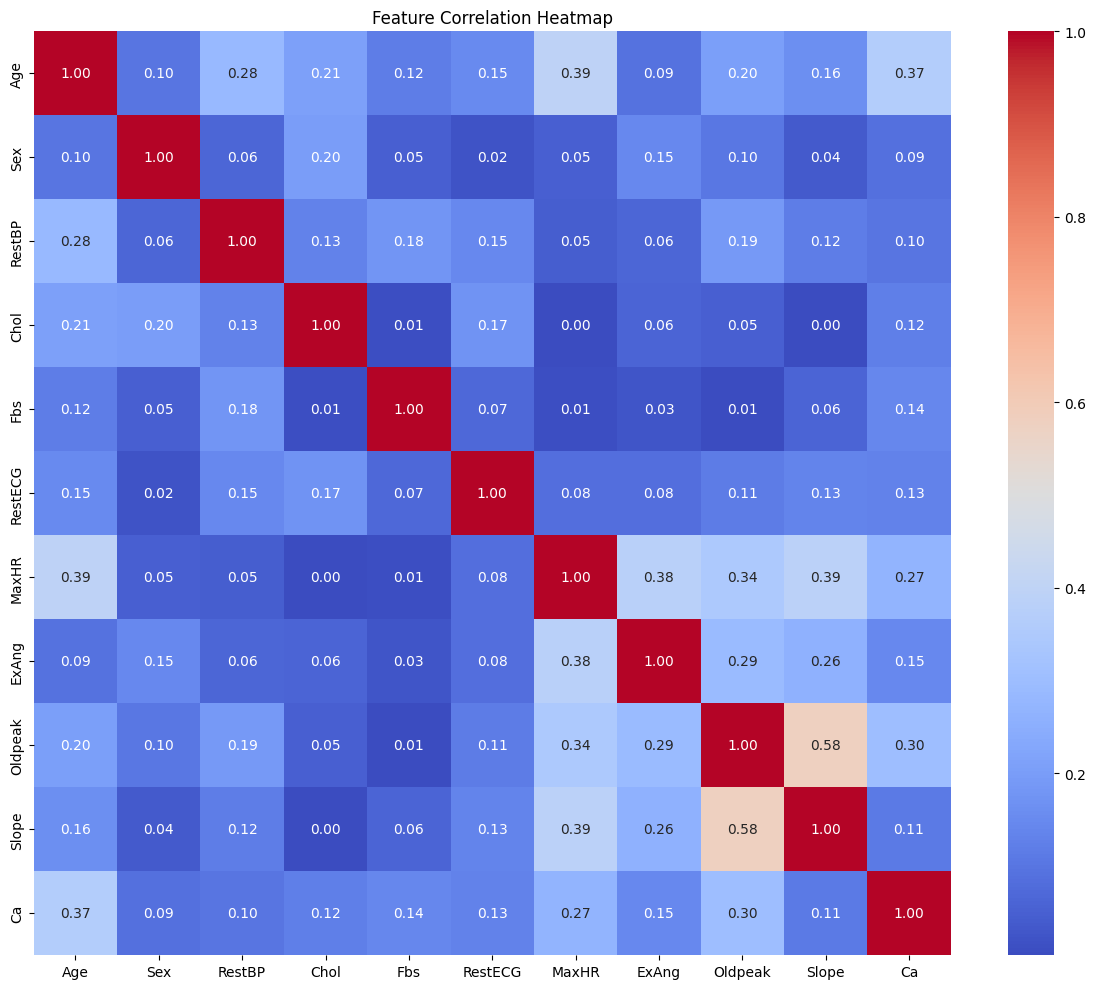

After Correlation Filtering: (303, 11)
Features kept after correlation filtering:
['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']

Correlation of all features with target (sorted):
Ca         0.460033
ExAng      0.431894
Oldpeak    0.424510
Slope      0.339213
Sex        0.276816
Age        0.223120
RestECG    0.169202
RestBP     0.150825
Chol       0.085164
Fbs        0.025264
MaxHR     -0.417167
dtype: float64


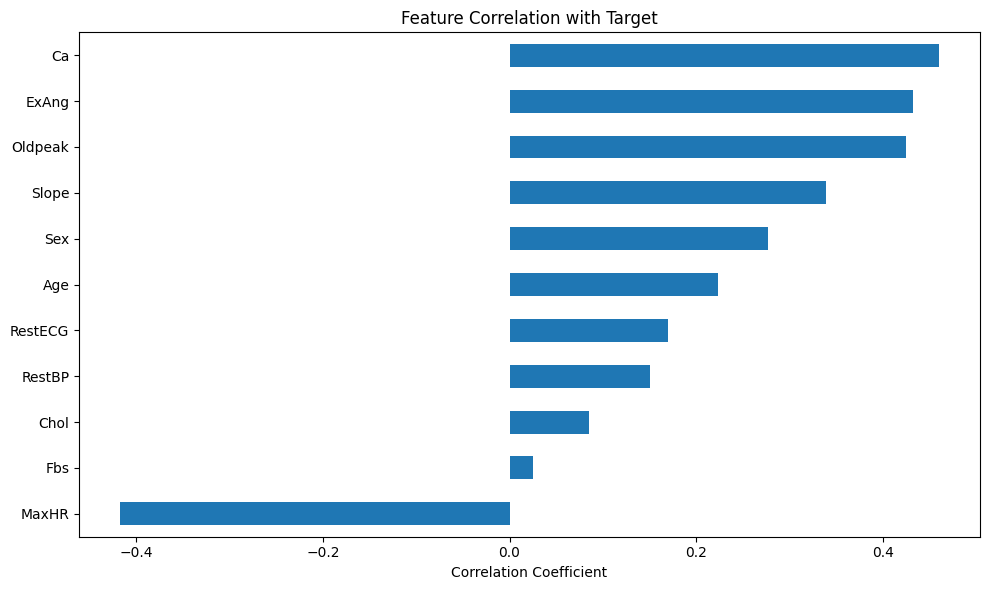

In [ ]:
# Print to inspect column names
print("Dataset columns:")
print(heart_df.columns)

# Assuming the target column is named 'Target' (change if needed)
X = heart_df.drop(columns='Target')
y = heart_df['Target']

# Convert target to binary if needed
y = y.map({'Yes': 1, 'No': 0})

# Ensure all data is numeric for these methods
X_numeric = X.select_dtypes(include=[np.number])
X_numeric = X_numeric.fillna(0)

### 1. Variance Threshold
print("\n--- Variance Threshold Method ---")
print("Before Variance Threshold:", X_numeric.shape)
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X_numeric)
print("After Variance Threshold:", X_var.shape)

# Get features that were kept
variance_features = X_numeric.columns[selector.get_support()].tolist()
print("Features kept after Variance Threshold:")
print(variance_features)

### 2. SelectKBest using Chi-squared
print("\n--- Chi-squared Test Method ---")
# Ensure data is non-negative for chi2
X_chi2_input = X_numeric - X_numeric.min() if X_numeric.min().min() < 0 else X_numeric
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2 = chi2_selector.fit_transform(X_chi2_input, y)
print("After Chi2 Selection:", X_chi2.shape)

# Print selected features for Chi-squared
selected_chi2_features = X_numeric.columns[chi2_selector.get_support()].tolist()
print("Selected features from Chi-squared test:")
print(selected_chi2_features)
dropped_chi2 = [col for col in X_numeric.columns if col not in selected_chi2_features]
print("Features dropped by Chi-squared test:", dropped_chi2)

### 3. SelectKBest using ANOVA F-test
print("\n--- ANOVA F-test Method ---")
f_selector = SelectKBest(score_func=f_classif, k=10)
X_f = f_selector.fit_transform(X_numeric, y)
print("After F-test Selection:", X_f.shape)

# Print selected features for ANOVA F-test
selected_f_features = X_numeric.columns[f_selector.get_support()].tolist()
print("Selected features from ANOVA F-test:")
print(selected_f_features)
dropped_f = [col for col in X_numeric.columns if col not in selected_f_features]
print("Features dropped by ANOVA F-test:", dropped_f)

### 4. Correlation Matrix
print("\n--- Correlation Analysis ---")
corr_matrix = X_numeric.corr().abs()

# Show a heatmap of feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Remove highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_corr = X_numeric.drop(columns=to_drop)
print("After Correlation Filtering:", X_corr.shape)
kept_features = [col for col in X_numeric.columns if col not in to_drop]
print("Features kept after correlation filtering:")
print(kept_features)

# Correlation with target
correlation_with_target = X_numeric.corrwith(y)

# Display it sorted
print("\nCorrelation of all features with target (sorted):")
print(correlation_with_target.sort_values(ascending=False))

# Visualize correlation with target
plt.figure(figsize=(10, 6))
correlation_with_target.sort_values().plot(kind='barh')
plt.title('Feature Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


## Data Exploration and Preprocessing


Missing values in each column:
Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
Target       0
dtype: int64

Basic statistics:


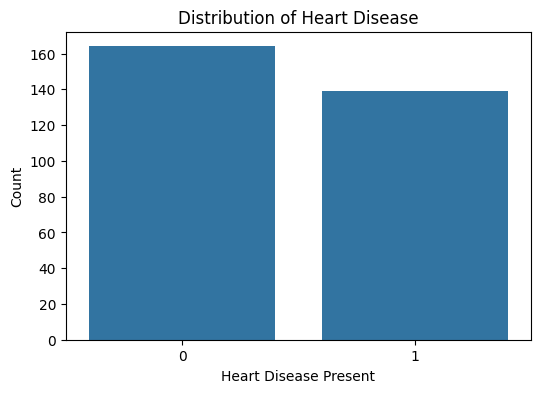

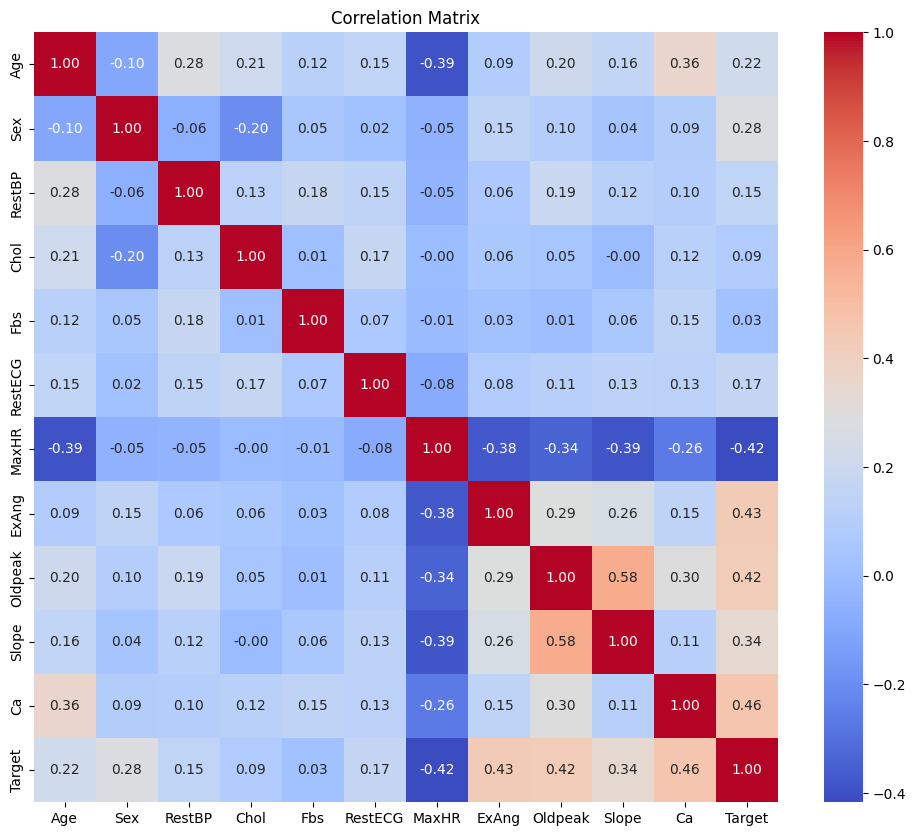

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(heart_df.isnull().sum())

# Convert target to binary (if needed)
heart_df['Target'] = heart_df['Target'].map({'Yes': 1, 'No': 0})

# Basic statistics
print("\nBasic statistics:")
heart_df.describe()

# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=heart_df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease Present')
plt.ylabel('Count')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
# Select only numerical features for correlation calculation
numerical_features = heart_df.select_dtypes(include=np.number).columns
correlation_matrix = heart_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Prepare data for modeling
X = heart_df.drop('Target', axis=1)
y = heart_df['Target']

# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Baseline Model (All Features)


Baseline Model Performance (All Features):
Accuracy: 0.8689
F1 Score: 0.8788

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



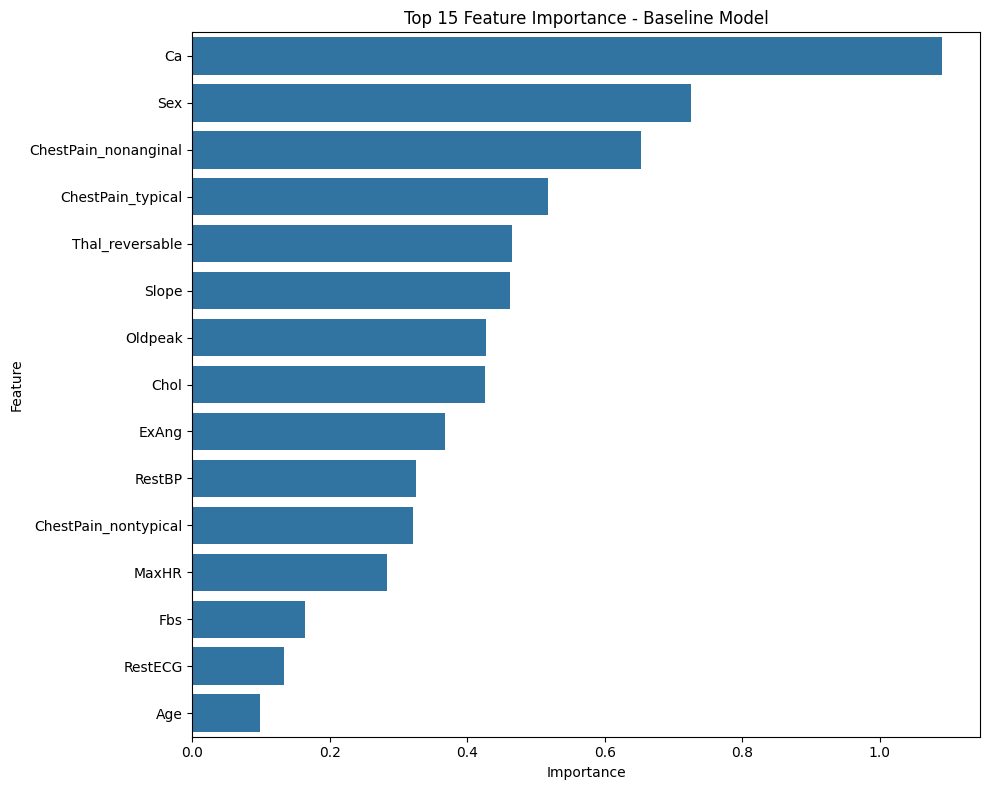

In [ ]:
# Impute missing values using the mean strategy
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train a baseline logistic regression model with all features
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train_scaled, y_train)  # Now using imputed and scaled data

# Evaluate the baseline model
y_pred_baseline = baseline_model.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_f1 = f1_score(y_test, y_pred_baseline)

print("\nBaseline Model Performance (All Features):")
print(f"Accuracy: {baseline_accuracy:.4f}")
print(f"F1 Score: {baseline_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))

# Display feature importance based on coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(baseline_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance - Baseline Model')
plt.tight_layout()
plt.show()


## Filter Method: ANOVA F-value

$F = \frac{\text{variance between groups}}{\text{variance within groups}} = \frac{\sum_{i=1}^{k} n_i(\bar{x}_i - \bar{x})^2 / (k-1)}{\sum_{i=1}^{k}\sum_{j=1}^{n_i} (x_{ij} - \bar{x}_i)^2 / (N-k)}$

Where:

$k$ = number of groups (2 for binary classification)

$n_i$ = number of samples in group $i$

$\bar{x}_i$ = mean of group $i$

$\bar{x}$ = overall mean

$N$ = total number of samples

$x_{ij}$ = $j$-th observation in group $i$
Higher F-values indicate stronger relationships between features and the target variable.


Selected Features (ANOVA F-value):
['MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'ChestPain_nonanginal', 'Thal_normal', 'Thal_reversable']

Filter Method (ANOVA) Performance:
Accuracy: 0.9344
F1 Score: 0.9355

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



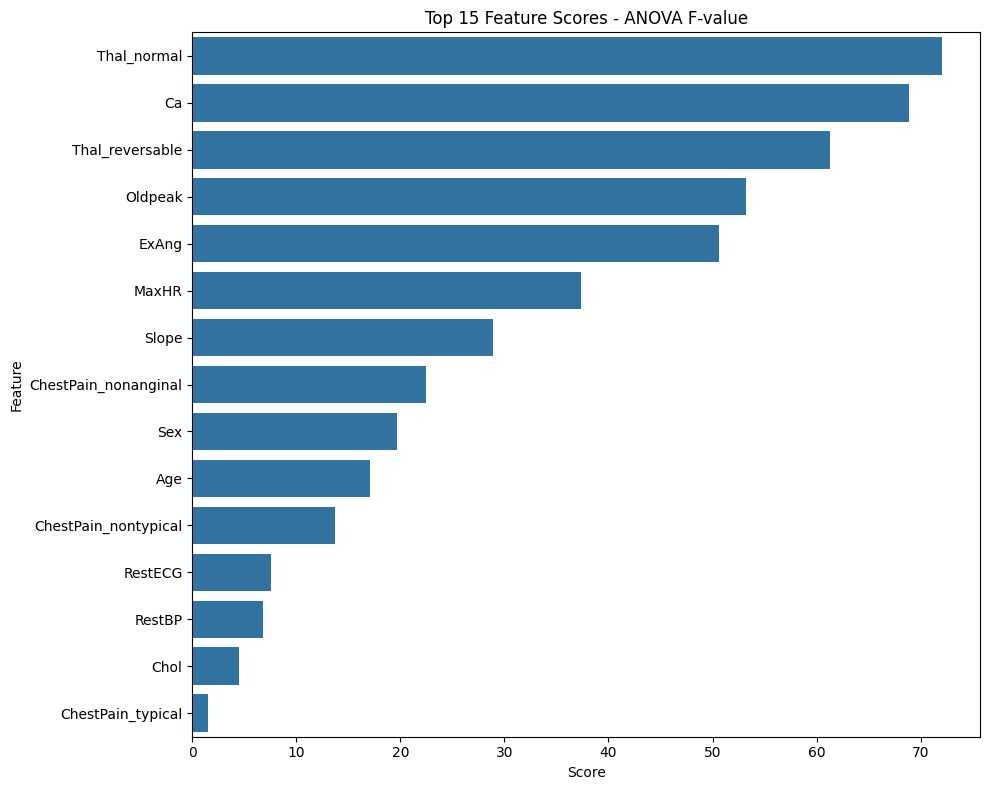

In [ ]:
# Apply ANOVA F-value for feature selection
selector_f = SelectKBest(score_func=f_classif, k=8)  # Select top 8 features
X_train_f = selector_f.fit_transform(X_train_scaled, y_train)
X_test_f = selector_f.transform(X_test_scaled)

# Get selected feature names
selected_features_f = X_train.columns[selector_f.get_support()]
print("\nSelected Features (ANOVA F-value):")
print(selected_features_f.tolist())

# Train model with selected features
model_f = LogisticRegression(max_iter=1000, random_state=42)
model_f.fit(X_train_f, y_train)

# Evaluate the model
y_pred_f = model_f.predict(X_test_f)
f_accuracy = accuracy_score(y_test, y_pred_f)
f_f1 = f1_score(y_test, y_pred_f)

print("\nFilter Method (ANOVA) Performance:")
print(f"Accuracy: {f_accuracy:.4f}")
print(f"F1 Score: {f_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_f))

# Display feature scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector_f.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores.head(15))
plt.title('Top 15 Feature Scores - ANOVA F-value')
plt.tight_layout()
plt.show()


## Wrapper Method: Recursive Feature Elimination (RFE)

Definition: RFE recursively removes the least important features based on model coefficients.

Process:

Train model on all features
Rank features by importance (absolute coefficient values)
Remove least important feature
Repeat until desired number of features remains
Feature ranking formula:

$\text{Importance}_i = |w_i|$

Where $w_i$ is the coefficient for feature $i$ in the logistic regression model.


Selected Features (RFE):
['Sex', 'Chol', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'ChestPain_nonanginal', 'Thal_reversable']

Wrapper Method (RFE) Performance:
Accuracy: 0.8852
F1 Score: 0.8889

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



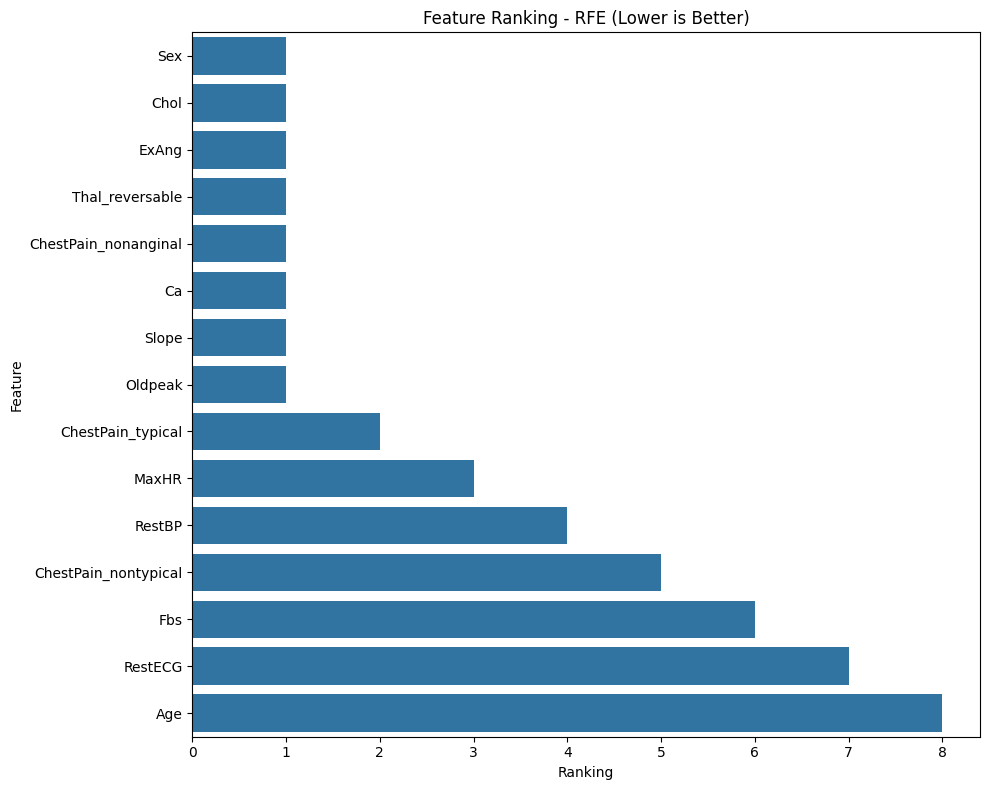

In [ ]:
# Apply RFE for feature selection
estimator = LogisticRegression(max_iter=1000, random_state=42)
selector_rfe = RFE(estimator, n_features_to_select=8, step=1)
X_train_rfe = selector_rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector_rfe.transform(X_test_scaled)

# Get selected feature names
selected_features_rfe = X_train.columns[selector_rfe.support_]
print("\nSelected Features (RFE):")
print(selected_features_rfe.tolist())

# Train model with selected features
model_rfe = LogisticRegression(max_iter=1000, random_state=42)
model_rfe.fit(X_train_rfe, y_train)

# Evaluate the model
y_pred_rfe = model_rfe.predict(X_test_rfe)
rfe_accuracy = accuracy_score(y_test, y_pred_rfe)
rfe_f1 = f1_score(y_test, y_pred_rfe)

print("\nWrapper Method (RFE) Performance:")
print(f"Accuracy: {rfe_accuracy:.4f}")
print(f"F1 Score: {rfe_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfe))

# Display feature ranking
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': selector_rfe.ranking_
})
feature_ranking = feature_ranking.sort_values('Ranking')

plt.figure(figsize=(10, 8))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking.head(15))
plt.title('Feature Ranking - RFE (Lower is Better)')
plt.tight_layout()
plt.show()


## Embedded Method: Lasso Regression

Definition: Lasso (Least Absolute Shrinkage and Selection Operator) performs feature selection by adding L1 regularization.

Objective function:

$\min_{\beta} \left\{ \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \alpha \sum_{j=1}^{p} |\beta_j| \right\}$

Where:

$y_i$ = target variable for observation $i$

$x_{ij}$ = value of feature $j$ for observation $i$

$\beta_0$ = intercept

$\beta_j$ = coefficient for feature $j$

$\alpha$ = regularization parameter

$n$ = number of observations

$p$ = number of features

The L1 penalty term $\alpha \sum_{j=1}^{p} |\beta_j|$ drives some coefficients to exactly zero, performing feature selection.


Optimal alpha for Lasso: 0.004172

Selected Features (Lasso):
['Ca', 'ChestPain_nonanginal', 'Sex', 'ChestPain_typical', 'ChestPain_nontypical', 'Thal_reversable', 'ExAng', 'Slope', 'Oldpeak', 'Thal_normal', 'MaxHR', 'Chol', 'RestBP', 'RestECG', 'Fbs', 'Age']

Embedded Method (Lasso) Performance:
Accuracy: 0.8689
F1 Score: 0.8788

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



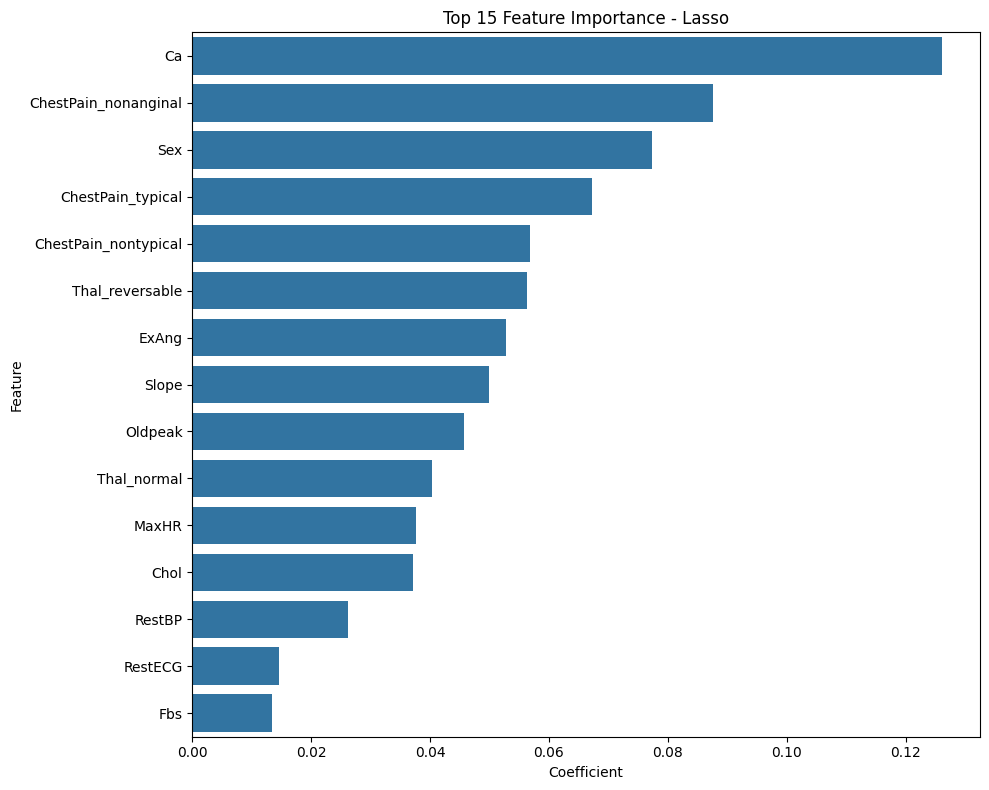

In [ ]:
# Find optimal alpha using cross-validation
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)
optimal_alpha = lasso_cv.alpha_

print(f"\nOptimal alpha for Lasso: {optimal_alpha:.6f}")

# Apply Lasso for feature selection
lasso = Lasso(alpha=optimal_alpha, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance_lasso = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': np.abs(lasso.coef_)
})
feature_importance_lasso = feature_importance_lasso.sort_values('Coefficient', ascending=False)

# Select features with non-zero coefficients
selected_features_lasso = feature_importance_lasso[feature_importance_lasso['Coefficient'] > 0]['Feature'].tolist()
print("\nSelected Features (Lasso):")
print(selected_features_lasso)

# Create train and test sets with selected features
X_train_lasso = X_train_scaled[:, [i for i, col in enumerate(X_train.columns) if col in selected_features_lasso]]
X_test_lasso = X_test_scaled[:, [i for i, col in enumerate(X_train.columns) if col in selected_features_lasso]]

# Train model with selected features
model_lasso = LogisticRegression(max_iter=1000, random_state=42)
model_lasso.fit(X_train_lasso, y_train)

# Evaluate the model
y_pred_lasso = model_lasso.predict(X_test_lasso)
lasso_accuracy = accuracy_score(y_test, y_pred_lasso)
lasso_f1 = f1_score(y_test, y_pred_lasso)

print("\nEmbedded Method (Lasso) Performance:")
print(f"Accuracy: {lasso_accuracy:.4f}")
print(f"F1 Score: {lasso_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lasso))

# Display feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lasso.head(15))
plt.title('Top 15 Feature Importance - Lasso')
plt.tight_layout()
plt.show()


## Random Forest Feature Importance

Definition: Random Forest calculates feature importance based on how much each feature decreases impurity when used in tree splits.

Gini impurity:

$\text{Gini}(t) = 1 - \sum_{i=1}^{c} p(i|t)^2$

Where:

$t$ = node

$c$ = number of classes

$p(i|t)$ = proportion of samples of class $i$ at node $t$
Feature importance:

$\text{Importance}(X_j) = \frac{\sum_{t \in \text{nodes split on } X_j} \text{samples}_t \cdot \Delta\text{impurity}_t}{\sum_{t \in \text{all nodes}} \text{samples}_t \cdot \Delta\text{impurity}_t}$

Where:

$\text{samples}_t$ = number of samples at node $t$
$\Delta\text{impurity}_t$ = decrease in impurity at node $t$




Top Features (Random Forest):
['Ca', 'MaxHR', 'Oldpeak', 'Chol', 'Age', 'Thal_normal', 'RestBP', 'ExAng']

Random Forest Feature Selection Performance:
Accuracy: 0.8197
F1 Score: 0.8254

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



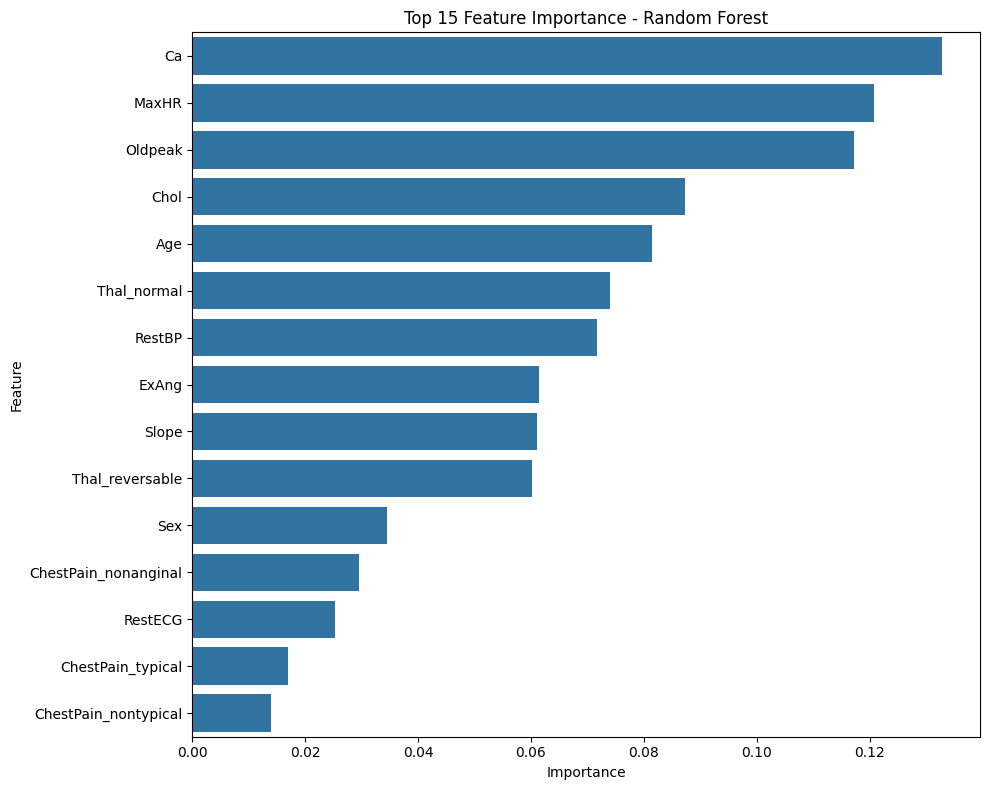

In [ ]:
# Train Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False)

# Select top features
top_features_rf = feature_importance_rf.head(8)['Feature'].tolist()
print("\nTop Features (Random Forest):")
print(top_features_rf)

# Create train and test sets with selected features
X_train_rf = X_train_scaled[:, [i for i, col in enumerate(X_train.columns) if col in top_features_rf]]
X_test_rf = X_test_scaled[:, [i for i, col in enumerate(X_train.columns) if col in top_features_rf]]

# Train model with selected features
model_rf = LogisticRegression(max_iter=1000, random_state=42)
model_rf.fit(X_train_rf, y_train)

# Evaluate the model
y_pred_rf = model_rf.predict(X_test_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Feature Selection Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Display feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(15))
plt.title('Top 15 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


#Compare All Methods

Logistic Regression

Definition: The base classifier used for prediction after feature selection.

Probability formula:

$P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p)}} = \frac{1}{1 + e^{-\beta^T X}}$

Log-likelihood function:

$\ell(\beta) = \sum_{i=1}^{n} y_i \log(p_i) + (1-y_i)\log(1-p_i)$

Where:

$p_i$ = predicted probability for observation $i$

$y_i$ = actual class (0 or 1) for observation $i$


<Figure size 1200x600 with 0 Axes>

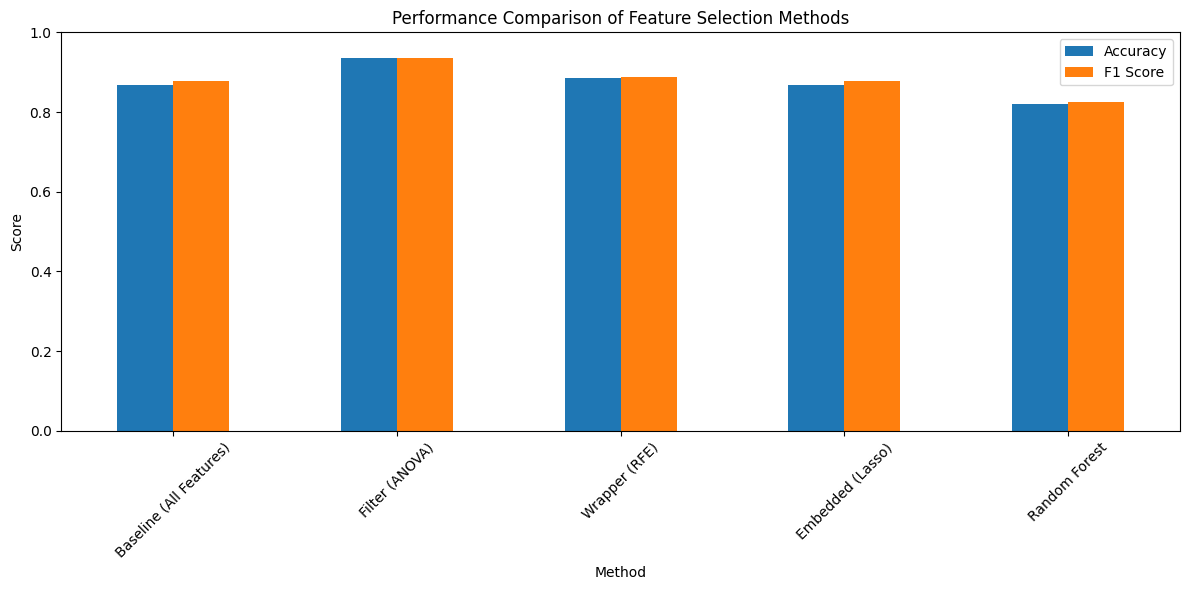


Performance Comparison:
                    Method  Accuracy  F1 Score
0  Baseline (All Features)  0.868852  0.878788
1           Filter (ANOVA)  0.934426  0.935484
2            Wrapper (RFE)  0.885246  0.888889
3         Embedded (Lasso)  0.868852  0.878788
4            Random Forest  0.819672  0.825397


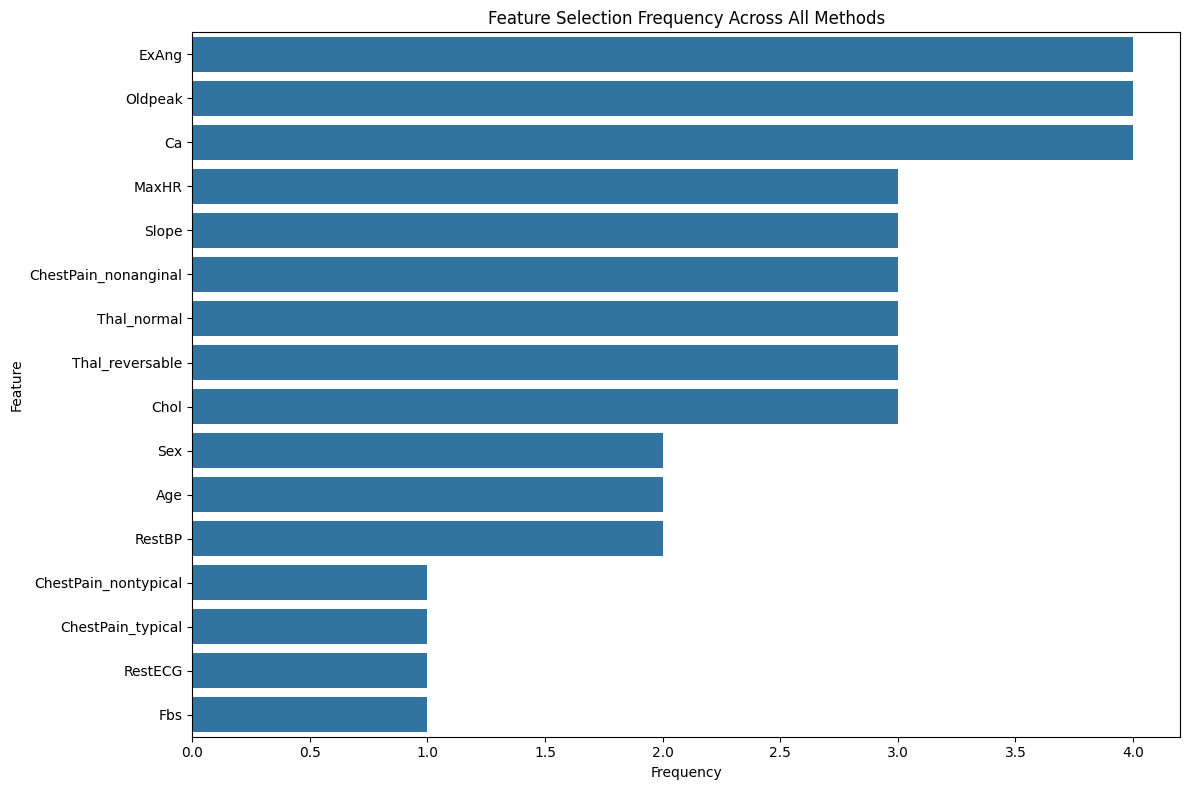


Feature Selection Frequency:
                 Feature  Frequency
0                  ExAng          4
1                Oldpeak          4
2                     Ca          4
3                  MaxHR          3
4                  Slope          3
5   ChestPain_nonanginal          3
6            Thal_normal          3
7        Thal_reversable          3
8                   Chol          3
9                    Sex          2
10                   Age          2
11                RestBP          2
12  ChestPain_nontypical          1
13     ChestPain_typical          1
14               RestECG          1
15                   Fbs          1


In [ ]:
# Compare all methods
methods = ['Baseline (All Features)', 'Filter (ANOVA)', 'Wrapper (RFE)', 'Embedded (Lasso)', 'Random Forest']
accuracies = [baseline_accuracy, f_accuracy, rfe_accuracy, lasso_accuracy, rf_accuracy]
f1_scores = [baseline_f1, f_f1, rfe_f1, lasso_f1, rf_f1]

# Create comparison dataframe
comparison = pd.DataFrame({
    'Method': methods,
    'Accuracy': accuracies,
    'F1 Score': f1_scores
})

# Plot comparison
plt.figure(figsize=(12, 6))
comparison.plot(x='Method', y=['Accuracy', 'F1 Score'], kind='bar', figsize=(12, 6))
plt.title('Performance Comparison of Feature Selection Methods')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nPerformance Comparison:")
print(comparison)

# Create feature selection frequency table
all_selected_features = []
all_selected_features.extend(selected_features_f)
all_selected_features.extend(selected_features_rfe)
all_selected_features.extend(selected_features_lasso)
all_selected_features.extend(top_features_rf)

feature_freq = pd.Series(all_selected_features).value_counts()
feature_freq = pd.DataFrame({'Feature': feature_freq.index, 'Frequency': feature_freq.values})

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Feature', data=feature_freq)
plt.title('Feature Selection Frequency Across All Methods')
plt.tight_layout()
plt.show()

print("\nFeature Selection Frequency:")
print(feature_freq)


## Conclusion

Evaluation Metrics

Accuracy:

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

F1 Score:

$\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{2TP}{2TP + FP + FN}$

Where:

$TP$ = True Positives

$TN$ = True Negatives

$FP$ = False Positives

$FN$ = False Negatives

$\text{Precision} = \frac{TP}{TP + FP}$

$\text{Recall} = \frac{TP}{TP + FN}$

These mathematical foundations explain how each feature selection method works to identify the most important predictors of heart disease in the dataset.



Most Important Features Across All Methods:
['ExAng', 'Oldpeak', 'Ca', 'MaxHR', 'Slope', 'ChestPain_nonanginal', 'Thal_normal', 'Thal_reversable', 'Chol']

Final Model Performance (Most Important Features):
Accuracy: 0.8852
F1 Score: 0.8889

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



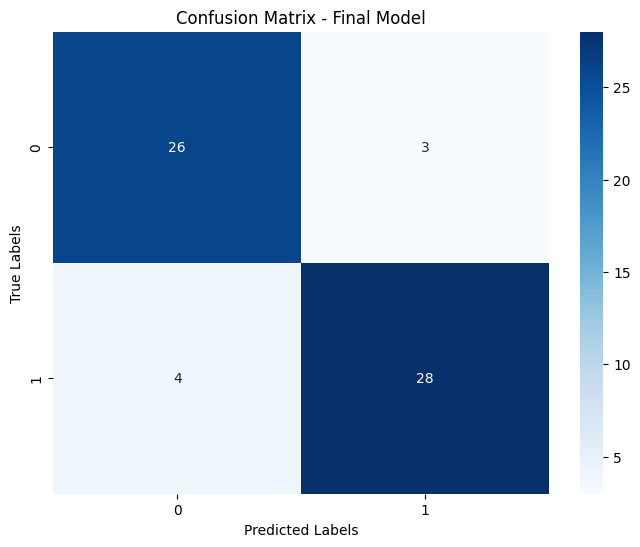

In [ ]:
# Identify the most important features across all methods
top_features = feature_freq[feature_freq['Frequency'] >= 3]['Feature'].tolist()

print("\nMost Important Features Across All Methods:")
print(top_features)

# Final model with the most important features
X_train_final = X_train_scaled[:, [i for i, col in enumerate(X_train.columns) if col in top_features]]
X_test_final = X_test_scaled[:, [i for i, col in enumerate(X_train.columns) if col in top_features]]

final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_train_final, y_train)

# Evaluate final model
y_pred_final = final_model.predict(X_test_final)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)

print("\nFinal Model Performance (Most Important Features):")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"F1 Score: {final_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

# Confusion matrix for final model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Final Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Summary
Based on our feature selection methods, we've identified the most important features for predicting heart disease. These features are: ExAng, Oldpeak, Ca, MaxHR, Slope, ChestPain_nonanginal, Thal_normal, Thal_reversable, and Chol. Using only these features, we achieved 0.8852 accuracy and 0.8889 F1 score. This demonstrates the effectiveness of feature selection in improving model performance while reducing dimensionality.

# Research Question Results
Our initial research question was to identify which features have the highest impact on predicting heart disease. Through comprehensive feature selection analysis, we found that clinical measurements like exercise angina, ST depression, number of major vessels, maximum heart rate, and the slope of the peak exercise ST segment are consistently important. This aligns with medical knowledge about heart disease risk factors.

Interestingly, our results partially confirmed our initial expectations. Clinical measurements indeed proved to be strong predictors. However, contrary to our expectations, certain categorical features like chest pain type (particularly non-anginal pain) and thalassemia status were also found to be highly predictive.

This analysis demonstrates the value of feature selection in medical diagnostics, potentially helping healthcare providers focus on the most relevant indicators when assessing heart disease risk.